In [37]:
import torch
from torch.autograd import Variable
from torch import nn
import torch.nn.functional as F

from torchvision import datasets
from torchvision import transforms

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0], [1])
])

batch_size = 64

train_dataset = datasets.MNIST('../data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)

test_dataset = datasets.MNIST('../data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

In [3]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 32, 5)
        self.pool1 = nn.AvgPool2d(2)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.pool2 = nn.AvgPool2d(2)
        self.fc1 = nn.Linear(1024, 512)
        self.fc2 = nn.Linear(512, 10)
        
    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        return x

In [11]:
conv_net = ConvNet()
optimizer = torch.optim.Adam(conv_net.parameters(), lr=1e-3)

losses = []

def train(epoch):
    for batch_idx, (train_x, train_y) in enumerate(train_loader):
        train_x, train_y = Variable(train_x), Variable(train_y)

        loss = F.cross_entropy(conv_net(train_x), train_y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
        losses.append(float(loss.data.numpy()))    

    print('Train epoch: {}, loss: {}'.format(epoch, float(loss.data.numpy())))
        

for epoch in range(10):
    train(epoch)

Train epoch: 0, loss: 1.4674427509307861
Train epoch: 1, loss: 1.4644447565078735
Train epoch: 2, loss: 1.468521237373352
Train epoch: 3, loss: 1.461358666419983
Train epoch: 4, loss: 1.4615541696548462
Train epoch: 5, loss: 1.4611519575119019
Train epoch: 6, loss: 1.4611679315567017
Train epoch: 7, loss: 1.4624286890029907
Train epoch: 8, loss: 1.4611566066741943
Train epoch: 9, loss: 1.4612230062484741


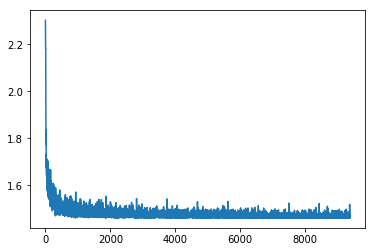

In [53]:
plt.plot(losses)

In [56]:
correct = 0
for _, (test_x , test_y) in enumerate(test_loader):
    test_x, test_y = Variable(test_x, volatile=True), Variable(test_y)
    correct += np.sum(test_y.data.numpy() == np.argmax(conv_net(test_x).data.numpy(), axis=1))
    
print(correct / len(test_dataset))

0.9889
